In [1]:
import gpytorch.kernels as kernel
import torch
import numpy as np
from src.test_statistics import *
from src.data import *
import random
import numpy as np
from src.test import *

In [2]:
X_ker = kernel.RBFKernel()
Y_ker = kernel.RBFKernel()

In [3]:
X_ker

RBFKernel(
  (raw_lengthscale_constraint): Positive()
)

In [4]:
n=100
X = torch.randn((n,2))
Y = torch.randn(n)
T = (torch.randn((n))>0).float()

In [5]:
a =torch.tensor([1,1],dtype=float) 

In [6]:
data_train = Data_object(X,Y,T)
data_train_flip = Data_object(X,Y,1-T)

In [7]:
m= 200
X = torch.randn((m,2))
Y = torch.randn(m)
T = (torch.randn((m))>0).float()

In [8]:
Y1 = torch.randn((1))

In [9]:
data_test = Data_object(X,Y,T)
data_test_flip = Data_object(X,Y,1-T)

In [10]:
W0 = get_W_matrix(X_ker(data_train.X0).evaluate(),1,func="cme")
W1 = get_W_matrix(Y_ker(data_train.X1).evaluate(),1,func="cme")

In [11]:
weights = 1/2*torch.ones(m)

In [12]:
K = ker(X_ker)
L = ker(Y_ker)

In [13]:
c = (data_test.T - weights)/(weights*(1-weights))
c

tensor([-2.,  2., -2.,  2., -2., -2.,  2., -2.,  2.,  2., -2., -2.,  2., -2.,
         2., -2., -2.,  2., -2., -2.,  2.,  2., -2.,  2.,  2.,  2.,  2.,  2.,
        -2.,  2.,  2., -2.,  2.,  2., -2.,  2.,  2., -2.,  2., -2.,  2.,  2.,
         2.,  2.,  2., -2.,  2.,  2.,  2., -2., -2., -2., -2.,  2., -2., -2.,
         2.,  2., -2., -2., -2., -2.,  2.,  2., -2., -2., -2.,  2., -2., -2.,
         2., -2., -2.,  2.,  2.,  2.,  2.,  2., -2.,  2., -2.,  2., -2.,  2.,
         2.,  2.,  2., -2.,  2., -2.,  2., -2., -2., -2., -2., -2.,  2., -2.,
         2., -2.,  2., -2.,  2.,  2.,  2.,  2.,  2.,  2., -2., -2.,  2., -2.,
        -2.,  2.,  2.,  2.,  2.,  2., -2.,  2., -2., -2., -2.,  2., -2., -2.,
        -2., -2.,  2.,  2., -2.,  2.,  2.,  2., -2.,  2., -2., -2., -2.,  2.,
        -2.,  2., -2., -2.,  2.,  2.,  2.,  2., -2., -2.,  2., -2.,  2., -2.,
         2., -2.,  2., -2., -2., -2.,  2.,  2., -2.,  2., -2.,  2., -2., -2.,
         2., -2.,  2.,  2., -2.,  2., -2., -2., -2.,  2., -2.,  

In [14]:
data_train.Y.shape

torch.Size([100])

In [15]:
L(data_train.Y0,data_train.Y).shape

torch.Size([52, 100])

In [16]:
DATE_test_stat(data_train,data_test,X_ker,Y_ker,weights,W0,W1)

0.03972241282463074

In [17]:
DETT_test_stat(data_train,data_test,X_ker,Y_ker,weights,W1)

0.009867262095212936

In [18]:
c

tensor([-2.,  2., -2.,  2., -2., -2.,  2., -2.,  2.,  2., -2., -2.,  2., -2.,
         2., -2., -2.,  2., -2., -2.,  2.,  2., -2.,  2.,  2.,  2.,  2.,  2.,
        -2.,  2.,  2., -2.,  2.,  2., -2.,  2.,  2., -2.,  2., -2.,  2.,  2.,
         2.,  2.,  2., -2.,  2.,  2.,  2., -2., -2., -2., -2.,  2., -2., -2.,
         2.,  2., -2., -2., -2., -2.,  2.,  2., -2., -2., -2.,  2., -2., -2.,
         2., -2., -2.,  2.,  2.,  2.,  2.,  2., -2.,  2., -2.,  2., -2.,  2.,
         2.,  2.,  2., -2.,  2., -2.,  2., -2., -2., -2., -2., -2.,  2., -2.,
         2., -2.,  2., -2.,  2.,  2.,  2.,  2.,  2.,  2., -2., -2.,  2., -2.,
        -2.,  2.,  2.,  2.,  2.,  2., -2.,  2., -2., -2., -2.,  2., -2., -2.,
        -2., -2.,  2.,  2., -2.,  2.,  2.,  2., -2.,  2., -2., -2., -2.,  2.,
        -2.,  2., -2., -2.,  2.,  2.,  2.,  2., -2., -2.,  2., -2.,  2., -2.,
         2., -2.,  2., -2., -2., -2.,  2.,  2., -2.,  2., -2.,  2., -2., -2.,
         2., -2.,  2.,  2., -2.,  2., -2., -2., -2.,  2., -2.,  

In [19]:
L(data_train.Y0,data_test.Y)@ c

tensor([-6.4942e+00,  2.4967e+01,  3.1520e+01,  1.7445e+01,  2.5589e+01,
         3.1444e+01,  1.2427e+01,  2.1717e+01,  3.0623e+01,  2.5514e+01,
         2.0455e+01,  1.5609e+01,  5.3548e+00,  2.7129e+01,  1.8876e+01,
         3.1180e+01,  2.3224e+01,  2.8401e+01,  2.6147e+01,  2.7570e+01,
         2.8317e+01,  2.2589e+01,  2.7568e+01,  2.3879e+01, -4.5322e+00,
         1.0272e+01,  9.6564e+00,  2.3845e+01,  2.6869e+01, -1.1544e+01,
         2.1680e+01,  2.6329e+01, -6.1530e+00, -1.1517e+01,  3.0079e+01,
        -1.7243e+00,  2.9982e+01,  2.3870e+00,  2.3609e+01,  4.4378e-02,
         9.6995e+00,  2.4105e-02,  3.1142e+01,  2.9931e+01,  5.1564e+00,
         2.3242e+01,  2.1758e+01,  2.6813e+01,  2.9601e+01,  4.1917e-01,
        -3.9448e+00, -1.4687e+01], grad_fn=<MvBackward0>)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
weights_model = LogisticRegression()

In [22]:
weights_model.fit(data_train.X,data_train.T)
weights_train = weights_model.predict_proba(data_train.X)[:,1]
weights_test = weights_model.predict_proba(data_test.X)[:,1]

In [23]:
result_dict = kernel_permutation_test(data_train,data_test,X_ker,Y_ker,weights_model,test_stat="DETT",n_bins=10,n_permutations=100,reg=1)

In [24]:
g = lambda X: X[:,0]**2 + X[:,1] 

mu = torch.tensor([0,0.5])
sigma = ["ID"]
g_0 = g
g_1 = g
noise = 0.1
n_sample =100

In [25]:
a = shift_data_simulation(mu,sigma,g_0,g_1,noise,n_sample)

/Users/jakefawkes/Python/DR_distributional_test/src/data.py:38: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu = torch.tensor(mu)


In [26]:
import yaml
import src.data as data

In [27]:
f = getattr(data,"shift_data_simulation")

In [28]:
with open("/Users/jakefawkes/Python/DR_distributional_test/config/run_simulated_shift_experiment.yaml", "r") as f:
    cfg = yaml.safe_load(f)

In [29]:
cfg

{'experiment': {'n_iter': 30,
  'test_stat': ['DATE', 'DETT'],
  'ker_regress': ['cme', 'zero'],
  'weights_model': 'Logistic_Regression',
  'X_ker': 'RBF',
  'Y_ker': 'RBF',
  'significance_level': 0.05,
  'n_bins': 20,
  'cme_reg': 0.01,
  'permute_weights': True,
  'KMM_weights': True},
 'data': {'generator': 'shift_data_simulation',
  'n_train_sample': 200,
  'n_test_sample': 200,
  'arguments': {'mu': [0.1, 0.1, 0.1, 0, 0, 0],
   'sigma': ['C_ID', 1.5],
   'noise': 0.2},
  'functions': {'g_0': 'f_3', 'g_1': 'f_4'}}}

In [30]:
def make_data(cfg):
    if cfg["data"]["generator"] == "shift_data_simulation":
        function_dict = {}
        for key in cfg["data"]["functions"]:
            function_dict[key] = getattr(data,cfg["data"]["functions"][key])
    data_train = shift_data_simulation(n_sample=cfg["data"]["n_train_sample"],**function_dict,**cfg["data"]["arguments"])
    data_test = shift_data_simulation(n_sample=cfg["data"]["n_test_sample"],**function_dict,**cfg["data"]["arguments"])
    return data_train,data_test

In [31]:
make_data(cfg)

(<src.data.Data_object at 0x7fcd4c477fa0>,
 <src.data.Data_object at 0x7fcd536d66a0>)

In [32]:
function_dict = {}
for key in cfg["data"]["functions"]:
    function_dict[key] = getattr(data,cfg["data"]["functions"][key])

In [33]:
a = shift_data_simulation(mu,sigma,g_0,g_1,noise,n_sample)

In [34]:
shift_data_simulation(n_sample=cfg["data"]["n_train_sample"],**function_dict,**cfg["data"]["arguments"])

In [35]:
float(True)

1.0

In [36]:
import pandas as pd

In [37]:
df_dict = {"Y":a.Y,"T":a.T}
df = pd.DataFrame(np.array(a.X))
df.columns = ["X"+str(i) for i in df.columns]

In [38]:
df["Y"] = a.Y
df["T"] = a.T

In [39]:
df

,X0,X1,Y,T
0,0.199106,-0.614065,-0.618429,0.0
1,0.988549,-0.661040,0.412550,0.0
2,0.440200,-1.753912,-1.511445,0.0
3,-0.573397,1.531934,1.899727,0.0
4,-1.299571,-0.374834,1.248494,0.0
...,...,...,...,...
95,1.267469,0.462067,2.071645,1.0
96,0.316135,0.025337,0.106099,1.0
97,0.426399,0.924406,0.978596,1.0
98,-1.923299,-1.116824,2.493613,1.0


In [40]:
import seaborn as sns

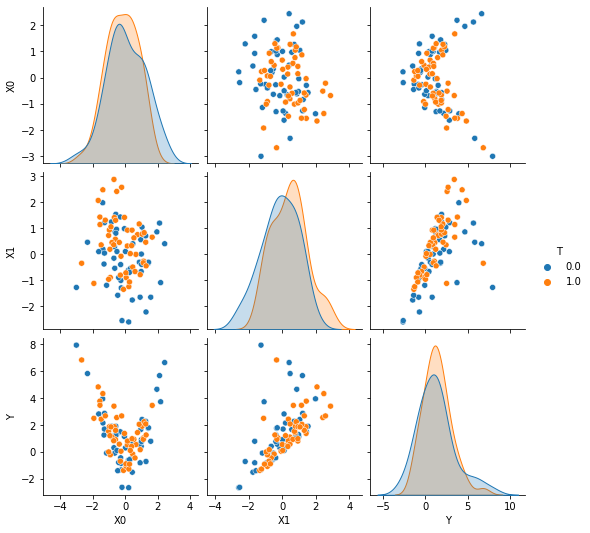

In [41]:
b = sns.pairplot(df, hue ="T")

In [42]:
from datetime import datetime


In [43]:
now = datetime.now()

In [44]:
now.strftime("%m-%d %H:%M:%S")

'07-07 14:33:14'

In [45]:
df_dict = {"weights" : weights_model.predict_proba(data_test.X)[:,1], "T" : data_test.T}

In [46]:
df = pd.DataFrame(df_dict)

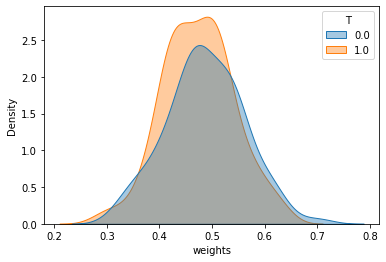

In [47]:
a = sns.kdeplot(data = df, x="weights", hue ="T",fill=True, alpha = 0.4)

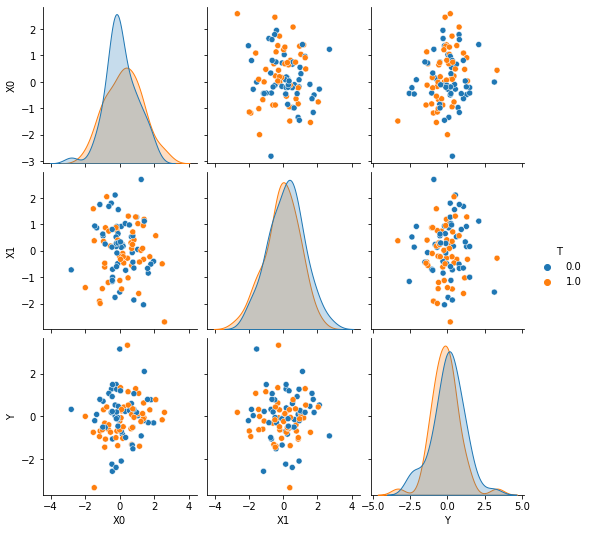

In [48]:
a = data_train.plot_data()

In [49]:
if "str":
    print("y")

y


In [50]:
a =[1,1]

In [51]:
if type(a) == list:
    print("y")

y


In [52]:
def linear_data_simulation(alpha_vec,beta_vec,beta_scalar,effect_var,noise_Y,n_sample):

    alpha_vec = torch.tensor(alpha_vec).float()
    beta_vec = torch.tensor(beta_vec).float()

    d = len(alpha_vec)

    X = torch.randn((n_sample,d)).float()
    T = torch.bernoulli(torch.sigmoid( X @ alpha_vec ))
    
    if effect_var == "const":
        effect_vec = torch.ones(n_sample)

    if effect_var == "Ber":
        effect_vec = 2*torch.bernoulli(1/2*torch.ones(n_sample))-1

    if effect_var == "Unif":
        effect_vec = 2*torch.rand(n_sample)-1

    Y =  X @ alpha_vec + beta_scalar * effect_vec + noise_Y * torch.randn((n_sample))

    return Data_object(X,Y,T)

In [53]:
alpha_vec = [1,1]
beta_vec = [1,1]
beta_scalar = 1
effect_var = "Ber"
noise_Y = 1
n_sample = 100
a= linear_data_simulation(alpha_vec,beta_vec,beta_scalar,effect_var,noise_Y,n_sample)

In [54]:
a.Y

tensor([-0.4343,  0.2893, -0.7355,  1.5133,  0.9389,  1.2299, -0.4204, -0.0380,
         0.8157,  2.0201,  1.3140,  2.6601, -2.9700, -0.7208, -0.0727, -0.9528,
         0.6007, -0.9228,  1.8775, -1.2609,  0.7341,  0.7265, -1.0510, -1.2039,
         1.4872, -0.5900, -0.4877,  1.9645,  2.8912, -0.1488, -2.4601,  0.4284,
        -1.0703,  2.6429,  2.8773, -0.7710,  0.3941, -1.1525,  0.2962, -0.1807,
         0.1126, -0.1416, -1.5247,  1.5937, -0.6796,  0.4730, -0.3850,  1.9284,
        -2.6280,  2.0458, -1.8956, -0.7299, -3.0764, -1.5654,  3.0758, -0.6339,
        -2.5949, -3.0718,  2.7074, -0.8204, -2.2464,  1.2127,  0.8630, -0.2380,
        -3.2798, -1.4807, -1.5595,  3.3522, -1.4742, -0.4480,  1.5936, -1.0098,
        -0.7398,  1.6423,  3.4334, -0.2426,  2.9268, -3.0653, -2.2179,  0.4014,
         0.6517, -0.8473,  1.9675,  1.6561,  4.7595,  2.4316,  1.0506,  0.8955,
        -1.6897,  2.5469,  3.2140,  0.0270,  1.7181, -4.2885, -1.5543,  5.1295,
         1.8625,  1.2244,  0.7015,  4.53

In [55]:
alpha_vec = torch.tensor(alpha_vec).float()
beta_vec = torch.tensor(beta_vec).float()

d = len(alpha_vec)

X = torch.randn((n_sample,d)).float()
T = torch.bernoulli(torch.sigmoid( X @ alpha_vec ))

if effect_var == "const":
    effect_vec = torch.ones(d)

if effect_var == "Ber":
    effect_vec = 2*torch.bernoulli(1/2*torch.ones(n_sample))-1

if effect_var == "Unif":
    effect_vec = 2*torch.rand(d)-1

Y =  X @ alpha_vec + beta_scalar * effect_vec + noise_Y * torch.randn((n_sample))


In [56]:
def cme_cross_validate_target(data_train,data_val,X_ker,Y_ker,reg_param):
        
        K = ker(X_ker)
        L = ker(Y_ker)

        W0 = get_W_matrix(X_ker(data_train.X0).evaluate(),reg_param,"cme")
        W1 = get_W_matrix(X_ker(data_train.X1).evaluate(),reg_param,"cme")

        val_stat_0 = torch.trace(L(data_val.Y0,data_val.Y0) -2 * K(data_train.X0,data_val.X0).T @ (W0 @ (L(data_train.Y0,data_val.Y0)))+ (K(data_train.X0,data_val.X0).T @ (W0 @ (L(data_train.Y0,data_train.Y0)@ (W0 @ (K(data_train.X0,data_val.X0)))))))
        val_stat_1 = torch.trace(L(data_val.Y1,data_val.Y1) -2 * K(data_train.X1,data_val.X1).T @ (W1 @ (L(data_train.Y1,data_val.Y1)))+ (K(data_train.X1,data_val.X1).T @ (W0 @ (L(data_train.Y1,data_train.Y1)@ (W0 @ (K(data_train.X1,data_val.X1)))))))
        val_stat = val_stat_0+val_stat_1
        return val_stat

In [57]:
def cme_cross_validate_target(data_train,data_val,X_ker,Y_ker,reg_param):
        
        K = ker(X_ker)
        L = ker(Y_ker)

        W0 = get_W_matrix(X_ker(data_train.X0).evaluate(),reg_param,"cme")
        W1 = get_W_matrix(X_ker(data_train.X1).evaluate(),reg_param,"cme")

        val_stat_0 = torch.trace(L(data_val.Y0,data_val.Y0) -2 * K(data_train.X0,data_val.X0).T @ (W0 @ (L(data_train.Y0,data_val.Y0))) + (K(data_train.X0,data_val.X0).T @ (W0 @ (L(data_train.Y0,data_train.Y0)@ (W0 @ (K(data_train.X0,data_val.X0)))))))
        val_stat_1 = torch.trace(L(data_val.Y1,data_val.Y1) -2 * K(data_train.X1,data_val.X1).T @ (W1 @ (L(data_train.Y1,data_val.Y1))) + (K(data_train.X1,data_val.X1).T @ (W1 @ (L(data_train.Y1,data_train.Y1)@ (W1 @ (K(data_train.X1,data_val.X1)))))))
        val_stat = val_stat_0+val_stat_1
        return val_stat

In [58]:
data_train = linear_data_simulation(alpha_vec,beta_vec,beta_scalar,effect_var,noise_Y,n_sample)
data_val = linear_data_simulation(alpha_vec,beta_vec,beta_scalar,effect_var,noise_Y,n_sample)
cme_cross_validate_target(data_train,data_val,X_ker,Y_ker,reg_param=1)

/var/folders/3k/2lkktjyj2r74wt_611v45qs00000gn/T/ipykernel_950/3842994627.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alpha_vec = torch.tensor(alpha_vec).float()
/var/folders/3k/2lkktjyj2r74wt_611v45qs00000gn/T/ipykernel_950/3842994627.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  beta_vec = torch.tensor(beta_vec).float()


tensor(99.7905, grad_fn=<AddBackward0>)

In [59]:
K = ker(X_ker)
L = ker(Y_ker)
W0 = get_W_matrix(X_ker(data_train.X0).evaluate(),1,"cme")
W1 = get_W_matrix(X_ker(data_train.X1).evaluate(),1,"cme")

In [60]:
L(data_val.Y0,data_val.Y0) -2 * K(data_train.X0,data_val.X0).T @ (W0 @ (L(data_train.Y0,data_val.Y0)))+ (K(data_train.X0,data_val.X0).T @ (W0 @ (L(data_train.Y0,data_train.Y0)@ (W0 @ (K(data_train.X0,data_val.X0))))))

tensor([[ 9.9803e-01,  2.6324e-01,  1.2111e-01,  ...,  3.5280e-01,
          3.8372e-02,  9.8512e-01],
        [ 2.6418e-01,  9.9710e-01, -8.6550e-04,  ...,  6.9270e-03,
          6.6134e-01,  2.0002e-01],
        [ 1.1872e-01, -3.3376e-03,  9.9696e-01,  ...,  8.2846e-01,
         -2.8123e-03,  1.6493e-01],
        ...,
        [ 3.5301e-01,  6.3492e-03,  8.2978e-01,  ...,  9.9801e-01,
         -1.5304e-03,  4.4016e-01],
        [ 3.7264e-02,  6.6115e-01, -3.4204e-03,  ..., -3.1731e-03,
          9.9841e-01,  2.3253e-02],
        [ 9.8546e-01,  2.0054e-01,  1.6627e-01,  ...,  4.3922e-01,
          2.5553e-02,  9.9837e-01]], grad_fn=<AddBackward0>)

In [61]:
from torch.autograd import Variable
from qpth.qp import QPFunction

def kernel_mean_matching(kernel_X, X0, X1 , eps=1, B=10 ):
    '''
    An implementation of Kernel Mean Matching, note that this implementation uses its own kernel parameter
    References:
    1. Gretton, Arthur, et al. "Covariate shift by kernel mean matching." 
    2. Huang, Jiayuan, et al. "Correcting sample selection bias by unlabeled data."
    
    :param X1: two dimensional sample from population 1
    :param X2: two dimensional sample from population 2
    :param kern: kernel to be used, an instance of class Kernel in kernel_utils
    :param B: upperbound on the solution search space 
    :param eps: normalization error
    :return: weight coefficients for instances x1 such that the distribution of weighted x1 matches x2
    '''
    n0 = X0.shape[0]
    n = X1.shape[0]
    G = torch.concat([torch.ones(1,n0),-torch.ones(1,n0),torch.eye(n0),-torch.eye(n0)])
    h = torch.concat([torch.tensor([n0 * (1 + eps),n0 * (eps - 1)]), B * torch.ones((n0,)),torch.zeros(n0) ])
    e = Variable(torch.Tensor())
    K_mat = kernel_X(X0, X0)
    kappa = torch.sum(kernel_X(X0, X1), axis=1) * float(n0) / float(n-n0)      
    
    coef = QPFunction(verbose=-1)(K_mat, -kappa, G, h, e, e)
        
    return coef

In [62]:
X0 = data_train.X0
X1 = data_train.X
eps = 0.01
B=10
n0 = X0.shape[0]
n = X1.shape[0]
G = torch.concat([torch.ones(1,n0),-torch.ones(1,n0),torch.eye(n0),-torch.eye(n0)])
h = torch.concat([torch.tensor([n0 * (1 + eps),n0 * (eps - 1)]), B * torch.ones((n0,)),torch.zeros(n0) ])
e = Variable(torch.Tensor())

K_mat = K(X0, X0)

kappa = torch.sum(K(X0, X1), axis=1) * float(n0) / float(n-n0)      

coef = QPFunction(verbose=-1)(K_mat, -kappa, G, h, e, e)

/opt/miniconda3/lib/python3.8/site-packages/qpth/qp.py:83: UserWarning: torch.eig is deprecated in favor of torch.linalg.eig and will be removed in a future PyTorch release.
torch.linalg.eig returns complex tensors of dtype cfloat or cdouble rather than real tensors mimicking complex tensors.
L, _ = torch.eig(A)
should be replaced with
L_complex = torch.linalg.eigvals(A)
and
L, V = torch.eig(A, eigenvectors=True)
should be replaced with
L_complex, V_complex = torch.linalg.eig(A) (Triggered internally at  /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/BatchLinearAlgebra.cpp:3427.)
  e, _ = torch.eig(Q[i])


In [63]:
coef

tensor([[ 2.4431e-01,  1.8810e+00, -4.5366e-01,  5.2411e-01, -1.4490e+00,
          3.0984e+00,  6.6376e-01,  2.1136e+00, -1.9699e-02,  5.0613e+00,
          4.7402e+00,  1.7028e+00,  2.6004e+00,  2.4244e+00,  1.3142e-01,
          2.9805e-01,  1.7380e-01,  8.3011e-01, -5.1343e-02,  1.7895e-01,
          6.1537e+00, -3.1674e+00,  1.9233e-01,  8.0387e+00,  4.5733e-02,
         -2.9145e+00, -4.8303e-01,  1.2398e+00,  1.8809e-01,  5.3946e-01,
          1.8504e-01, -5.1246e-02, -4.1418e-01,  4.8595e-02, -2.8758e-02,
          2.7491e-02,  5.0639e-03,  1.0007e+00,  1.0322e-02,  4.1244e+00,
          4.6931e-02,  7.9027e-02,  5.9754e+00,  1.4955e+00,  5.0461e-02,
          2.7279e-01, -3.7417e-04,  1.6200e+00]],
       grad_fn=<QPFunctionFnBackward>)

In [64]:
n0 = X0.shape[0]
n = X1.shape[0]
kernel_X = K
G = torch.concat([torch.ones(1,n0),-torch.ones(1,n0),torch.eye(n0),-torch.eye(n0)])
h = torch.concat([torch.tensor([n0 * (1 + eps),n0 * (eps - 1)]), B * torch.ones((n0,)),torch.zeros(n0) ])
e = Variable(torch.Tensor())
K_mat = kernel_X(X0, X0)
kappa = torch.sum(kernel_X(X0, X1), axis=1) * float(n0) / float(n-n0)      

coef = QPFunction(verbose=-1)(K_mat, -kappa, G, h, e, e)

In [65]:
def kernel_mean_matching(kernel_X, X0, X1 , eps=1, B=10 ):
    '''
    An implementation of Kernel Mean Matching, note that this implementation uses its own kernel parameter
    References:
    1. Gretton, Arthur, et al. "Covariate shift by kernel mean matching." 
    2. Huang, Jiayuan, et al. "Correcting sample selection bias by unlabeled data."
    
    :param X1: two dimensional sample from population 1
    :param X2: two dimensional sample from population 2
    :param kern: kernel to be used, an instance of class Kernel in kernel_utils
    :param B: upperbound on the solution search space 
    :param eps: normalization error
    :return: weight coefficients for instances x1 such that the distribution of weighted x1 matches x2
    '''
    n0 = X0.shape[0]
    n = X1.shape[0]
    G = torch.concat([torch.ones(1,n0),-torch.ones(1,n0),torch.eye(n0),-torch.eye(n0)])
    h = torch.concat([torch.tensor([n0 * (1 + eps),n0 * (eps - 1)]), B * torch.ones((n0,)),torch.zeros(n0) ])
    e = Variable(torch.Tensor())
    K_mat = kernel_X(X0, X0)
    kappa = torch.sum(kernel_X(X0, X1), axis=1) * float(n0) / float(n-n0)      
    
    coef = QPFunction(verbose=-1)(K_mat, -kappa, G, h, e, e)
        
    return coef

In [67]:
kernel_mean_matching(K, X0, X1 , eps=100, B=10000)

tensor([[-3.2282e+03,  2.8078e+03, -3.2739e+03,  3.6856e+03,  1.2948e+04,
         -1.1970e+04,  4.1326e+03,  7.0407e+02, -8.1373e+01, -8.4694e+02,
          7.4557e+01,  3.9439e+02, -5.7285e+03,  1.5198e+02, -2.5820e+02,
         -5.9549e+01, -4.5766e+03, -2.1023e+02,  3.9248e+02, -1.2165e+02,
         -1.1948e+03,  9.0566e+02,  1.5500e+03, -1.3759e+04,  2.1821e+01,
         -4.3058e+02, -2.9546e+02,  2.0070e+04,  3.2357e+02, -5.7650e+02,
         -3.8334e+02, -2.5820e+03,  2.8863e+03,  5.7598e+02,  7.7808e+02,
          3.5633e+01,  1.5031e+01, -5.7837e+01,  1.6845e+01, -1.2436e+01,
          6.8435e+01,  2.6624e+03,  1.2078e+01, -8.4182e+00, -1.0108e+01,
          8.9642e+02,  1.7250e+03,  2.4641e+01]],
       grad_fn=<QPFunctionFnBackward>)

In [ ]:
KMM_weights_for_W_matrix(X_ker,X0,X1,KMM_weights = True)

TypeError: 'Tensor' object is not callable

In [68]:
# Load config file
with open("config/wrapped_simulaton_cfg.yaml", "r") as f:
    cfg = yaml.safe_load(f)

In [79]:
cfg

{'moving_param': {'param': ['n_test_sample', 'n_test_sample'], 'values': 1},
 'experiment': {'n_iter': 30,
  'test_stat': ['DATE', 'DETT'],
  'ker_regress': ['cme', 'zero'],
  'weights_model': 'Logistic_Regression',
  'X_ker': 'RBF',
  'Y_ker': 'RBF',
  'significance_level': 0.05,
  'n_bins': 20,
  'cme_reg': 0.01,
  'permute_weights': True,
  'KMM_weights': True},
 'data': {'generator': 'linear_data_simulation',
  'n_train_sample': 1000,
  'n_test_sample': 1000,
  'arguments': {'alpha_vec': [0.1, 0.2, 0.3, 0.4, 0.5],
   'beta_vec': [0.1, 0.2, 0.3, 0.4, 0.5],
   'beta_scalar': 0.2,
   'effect_var': 'Unif',
   'noise_Y': 0.2}}}

In [83]:
a = cfg["moving_param"]["param"]

In [84]:
a

['n_test_sample', 'n_test_sample']

In [76]:
a["values"] = 1

In [81]:
type(a)

dict